In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.pylab import rcParams
from datetime import datetime
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram

In [3]:
s_path = '/home/lserra/Documents/b2w/bases/'

In [4]:
df_sales = pd.read_csv(s_path + 'vw_ger_sales_day.csv')

In [5]:
df_sales.head()

,DATE,PRODUCT,QTY_ORDER,SALES,AVG_SALES,MIN_UNIT_PRICE,MAX_UNIT_PRICE,DIFF_UNIT_PRICE,VAR_UNIT_PRICE,AVG_PRICE,TOTAL_ITEMS,AVG_ITEMS
0,2015-01-01,P2,23,18984.10,825.40,746.1,829.0,82.9,11.11,825.40,23,1.00
1,2015-01-01,P6,1,1914.80,1914.80,1914.8,1914.8,0.0,0.00,1914.80,1,1.00
2,2015-01-01,P7,321,255871.81,817.48,719.1,899.0,179.9,25.02,797.32,321,1.03
3,2015-01-02,P2,90,74474.10,846.30,774.2,829.9,55.7,7.19,827.46,90,1.02
4,2015-01-02,P6,8,15318.40,1914.80,1914.8,1914.8,0.0,0.00,1914.80,8,1.00


In [6]:
df_sales.dtypes

DATE                object
PRODUCT             object
QTY_ORDER            int64
SALES              float64
AVG_SALES          float64
MIN_UNIT_PRICE     float64
MAX_UNIT_PRICE     float64
DIFF_UNIT_PRICE    float64
VAR_UNIT_PRICE     float64
AVG_PRICE          float64
TOTAL_ITEMS          int64
AVG_ITEMS          float64
dtype: object

In [7]:
df_sales.DATE = df_sales.DATE.apply(lambda d: datetime.strptime(d, "%Y-%m-%d"))

In [8]:
df_sales.DATE.head()

0   2015-01-01
1   2015-01-01
2   2015-01-01
3   2015-01-02
4   2015-01-02
Name: DATE, dtype: datetime64[ns]

In [9]:
df_sales.index = df_sales.DATE

In [10]:
df_sales.head(10)

,DATE,PRODUCT,QTY_ORDER,SALES,AVG_SALES,MIN_UNIT_PRICE,MAX_UNIT_PRICE,DIFF_UNIT_PRICE,VAR_UNIT_PRICE,AVG_PRICE,TOTAL_ITEMS,AVG_ITEMS
DATE,,,,,,,,,,,,
2015-01-01,2015-01-01,P2,23,18984.10,825.40,746.10,829.0,82.90,11.11,825.40,23,1.00
2015-01-01,2015-01-01,P6,1,1914.80,1914.80,1914.80,1914.8,0.00,0.00,1914.80,1,1.00
2015-01-01,2015-01-01,P7,321,255871.81,817.48,719.10,899.0,179.90,25.02,797.32,321,1.03
2015-01-02,2015-01-02,P2,90,74474.10,846.30,774.20,829.9,55.70,7.19,827.46,90,1.02
2015-01-02,2015-01-02,P6,8,15318.40,1914.80,1914.80,1914.8,0.00,0.00,1914.80,8,1.00
2015-01-02,2015-01-02,P7,812,647544.44,829.12,719.10,799.0,79.90,11.11,797.41,812,1.04
2015-01-03,2015-01-03,P2,69,57118.10,839.97,746.10,829.0,82.90,11.11,827.78,69,1.01
2015-01-03,2015-01-03,P6,6,11488.80,1914.80,1914.80,1914.8,0.00,0.00,1914.80,6,1.00
2015-01-03,2015-01-03,P7,662,527377.70,825.32,705.58,799.0,93.42,13.24,796.56,662,1.04


In [11]:
freezing_prod = df_sales[df_sales.PRODUCT == 'P8']
freezing_prod.head()

,DATE,PRODUCT,QTY_ORDER,SALES,AVG_SALES,MIN_UNIT_PRICE,MAX_UNIT_PRICE,DIFF_UNIT_PRICE,VAR_UNIT_PRICE,AVG_PRICE,TOTAL_ITEMS,AVG_ITEMS
DATE,,,,,,,,,,,,
2015-03-19,2015-03-19,P8,4,2156.40,539.10,539.10,539.1,0.00,0.00,539.10,4,1.0
2015-03-20,2015-03-20,P8,19,10422.60,548.56,539.10,599.0,59.90,11.11,548.56,19,1.0
2015-03-21,2015-03-21,P8,5,2995.00,599.00,599.00,599.0,0.00,0.00,599.00,5,1.0
2015-03-22,2015-03-22,P8,10,5960.05,596.00,569.05,599.0,29.95,5.26,596.00,10,1.0
2015-03-23,2015-03-23,P8,8,4732.10,591.51,569.05,599.0,29.95,5.26,591.51,8,1.0


In [12]:
freezing_prod.describe()

,QTY_ORDER,SALES,AVG_SALES,MIN_UNIT_PRICE,MAX_UNIT_PRICE,DIFF_UNIT_PRICE,VAR_UNIT_PRICE,AVG_PRICE,TOTAL_ITEMS,AVG_ITEMS
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,142.000000,57893.716238,486.748143,428.595762,510.055857,81.460095,20.182333,466.187143,142.000000,1.046286
std,253.975491,95368.643071,55.111199,65.386992,63.717978,50.154095,13.676031,55.772325,253.975491,0.045427
min,3.000000,1797.000000,389.410000,229.000000,379.000000,0.000000,0.000000,371.360000,3.000000,1.000000
25%,23.250000,11435.662500,450.212500,393.650000,469.000000,47.900000,11.110000,437.302500,23.250000,1.000000
50%,49.000000,22343.615000,479.680000,431.100000,499.000000,70.295000,16.960000,459.735000,49.000000,1.040000
75%,117.000000,50015.215000,515.250000,449.700000,599.000000,117.702500,27.080000,497.202500,117.000000,1.070000
max,1812.000000,674246.670000,737.520000,599.000000,599.000000,241.080000,74.670000,599.000000,1812.000000,1.250000


In [13]:
rcParams['figure.figsize'] = (15,6)

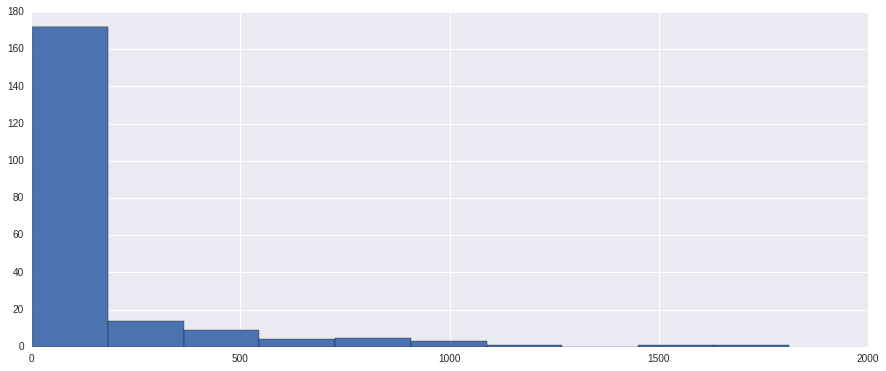

In [14]:
freezing_prod.QTY_ORDER.hist()

In [15]:
freezing_prod.QTY_ORDER.tail()

DATE
2015-10-10    252
2015-10-11    179
2015-10-12    259
2015-10-13    560
2015-10-14    915
Name: QTY_ORDER, dtype: int64

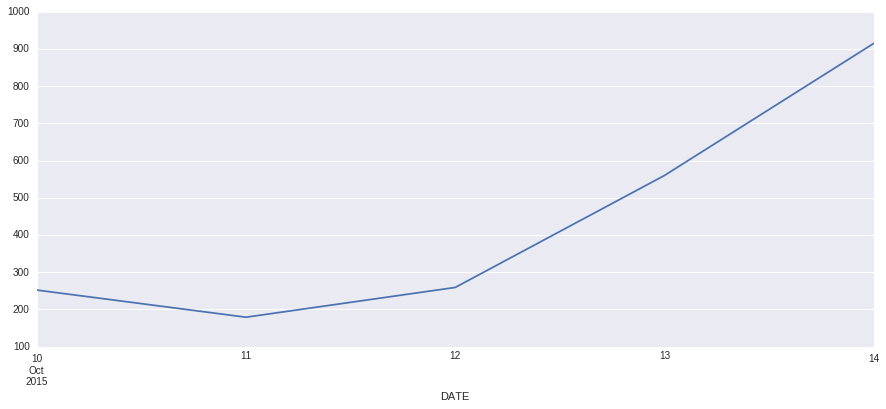

In [16]:
freezing_prod.QTY_ORDER.tail().plot()

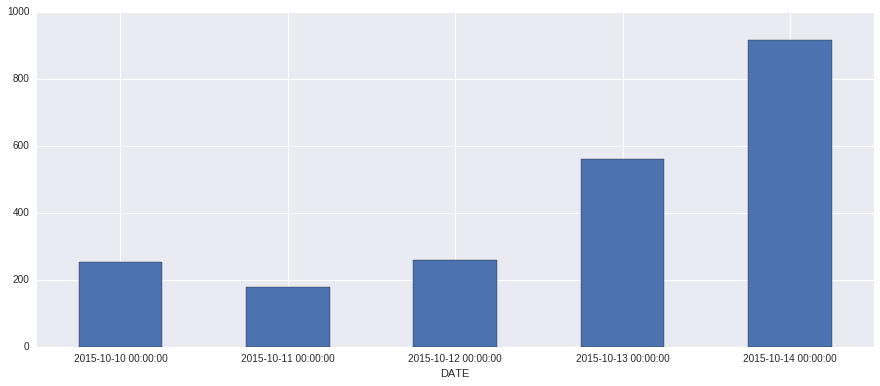

In [17]:
freezing_prod.QTY_ORDER.tail().plot(kind="bar", rot=0)

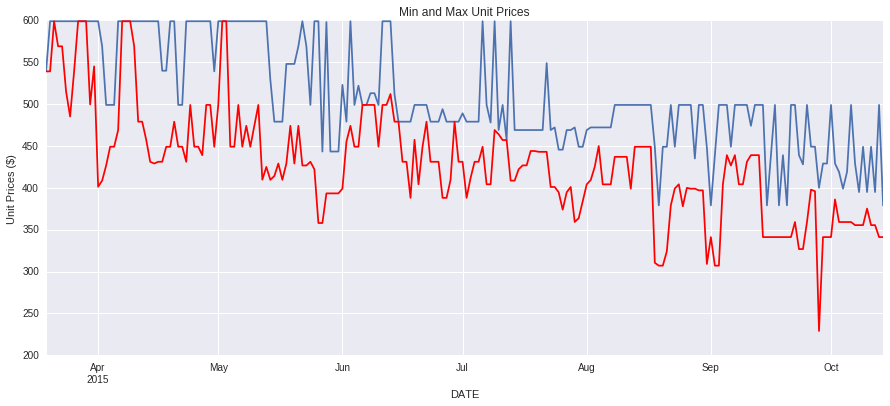

In [18]:
ax = freezing_prod.MAX_UNIT_PRICE.plot(title="Min and Max Unit Prices")
freezing_prod.MIN_UNIT_PRICE.plot(style="red", ax=ax)
ax.set_ylabel("Unit Prices ($)")

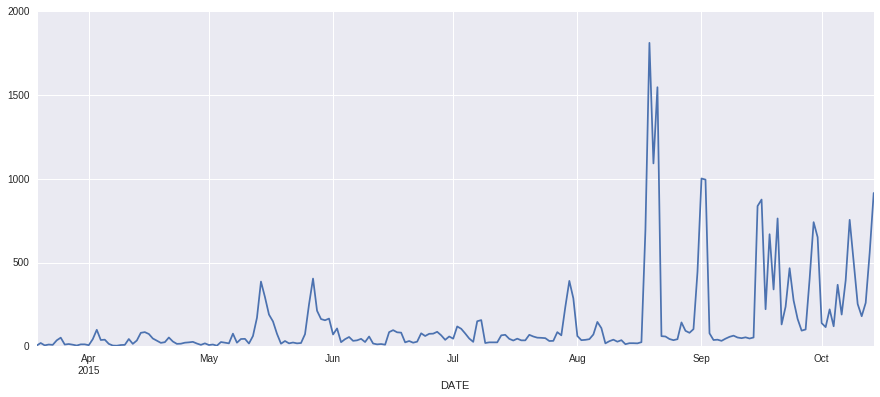

In [19]:
freezing_prod.QTY_ORDER.plot()

In [20]:
df_log = np.log(freezing_prod['QTY_ORDER'])

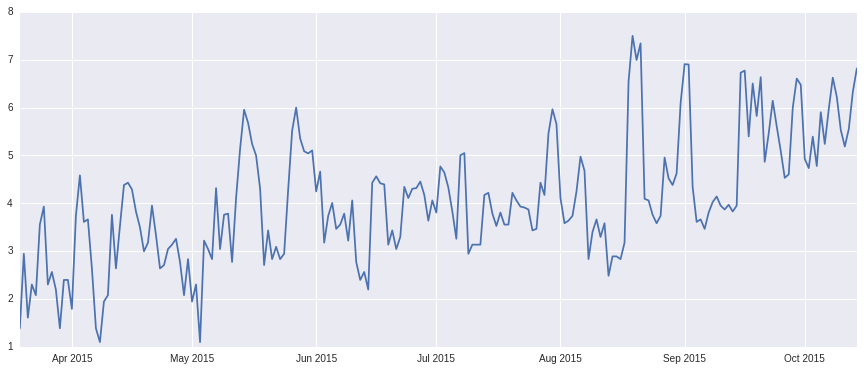

In [21]:
plt.plot(df_log)

In [22]:
moving_avg = pd.rolling_mean(df_log, 12)

/home/lserra/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).mean()
  if __name__ == '__main__':


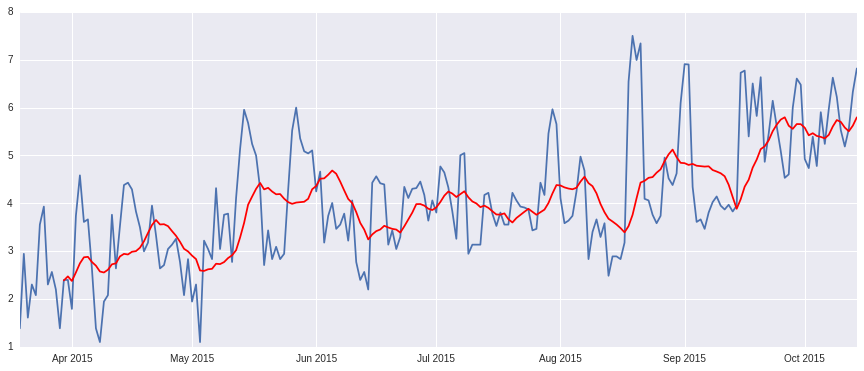

In [23]:
plt.plot(df_log)
plt.plot(moving_avg, color='red')

In [24]:
log_moving_avg_diff = df_log - moving_avg

In [25]:
log_moving_avg_diff.head(12)

DATE
2015-03-19         NaN
2015-03-20         NaN
2015-03-21         NaN
2015-03-22         NaN
2015-03-23         NaN
2015-03-24         NaN
2015-03-25         NaN
2015-03-26         NaN
2015-03-27         NaN
2015-03-28         NaN
2015-03-29         NaN
2015-03-30    0.009702
Name: QTY_ORDER, dtype: float64

In [26]:
log_moving_avg_diff.dropna(inplace=True)

In [27]:
log_moving_avg_diff

DATE
2015-03-30    0.009702
2015-03-31   -0.074598
2015-04-01   -0.584677
2015-04-02    1.183880
2015-04-03    1.840980
2015-04-04    0.739307
2015-04-05    0.782933
2015-04-06   -0.133841
2015-04-07   -1.310246
2015-04-08   -1.475734
2015-04-09   -0.607493
2015-04-10   -0.531724
2015-04-11    1.036426
2015-04-12   -0.105813
2015-04-13    0.636940
2015-04-14    1.438909
2015-04-15    1.500545
2015-04-16    1.303560
2015-04-17    0.827985
2015-04-18    0.424397
2015-04-19   -0.210498
2015-04-20   -0.201463
2015-04-21    0.404615
2015-04-22   -0.318821
2015-04-23   -0.918456
2015-04-24   -0.855213
2015-04-25   -0.478587
2015-04-26   -0.283738
2015-04-27   -0.063409
2015-04-28   -0.422427
                ...   
2015-09-15    2.645007
2015-09-16    2.426845
2015-09-17    0.905091
2015-09-18    1.759375
2015-09-19    0.911313
2015-09-20    1.504912
2015-09-21   -0.325178
2015-09-22    0.145070
2015-09-23    0.636009
2015-09-24   -0.035304
2015-09-25   -0.656451
2015-09-26   -1.266048
2015-0

In [28]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    
    # Determinando rolling estatisticas
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    # Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Perform Dickey-Fuller test:
    print ('Resultados do teste Dickey-Fuller:')
    df_test = adfuller(timeseries, autolag='AIC')
    df_output = pd.Series(df_test[0:4], index=['Teste Estatistico','p-value',
    '#Lags Usados','Numero de Observacoes Usados'])
    for key,value in df_test[4].items():
        df_output['Valores Criticos (%s)'%key] = value
    print (df_output)

/home/lserra/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:6: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).mean()
/home/lserra/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:7: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).std()


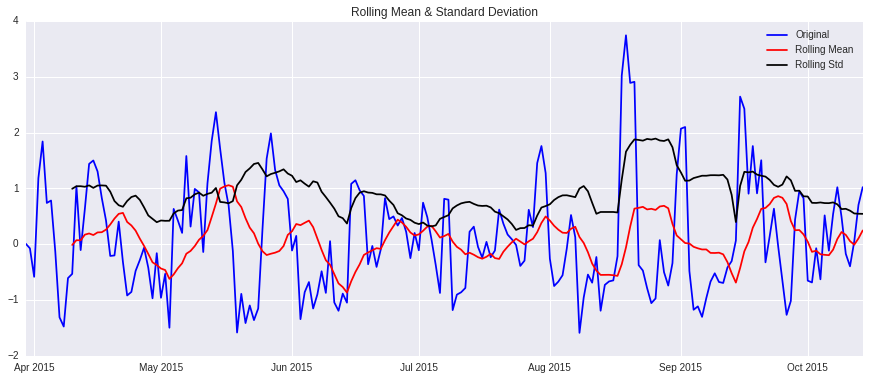

Resultados do teste Dickey-Fuller:
Teste Estatistico                -5.504567
p-value                           0.000002
#Lags Usados                     15.000000
Numero de Observacoes Usados    183.000000
Valores Criticos (1%)            -3.466598
Valores Criticos (5%)            -2.877467
Valores Criticos (10%)           -2.575260
dtype: float64


In [29]:
test_stationarity(log_moving_avg_diff)

In [30]:
expwighted_avg = pd.ewma(df_log, halflife=12)

/home/lserra/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(min_periods=0,adjust=True,halflife=12,ignore_na=False).mean()
  if __name__ == '__main__':


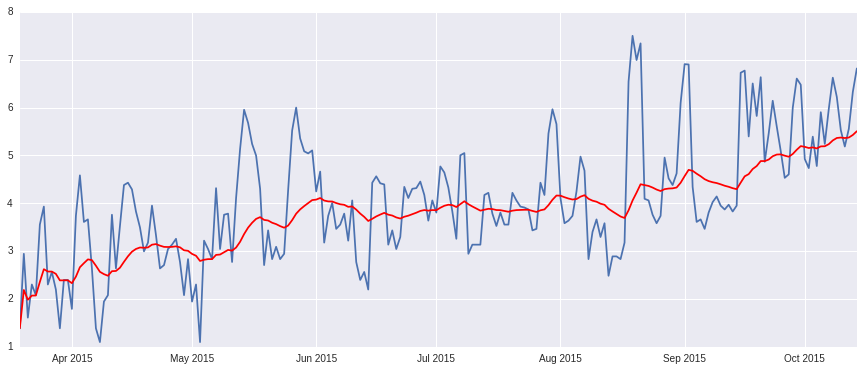

In [31]:
plt.plot(df_log)
plt.plot(expwighted_avg, color='red')

In [32]:
log_ewma_diff = df_log - expwighted_avg

/home/lserra/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:6: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).mean()
/home/lserra/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:7: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).std()


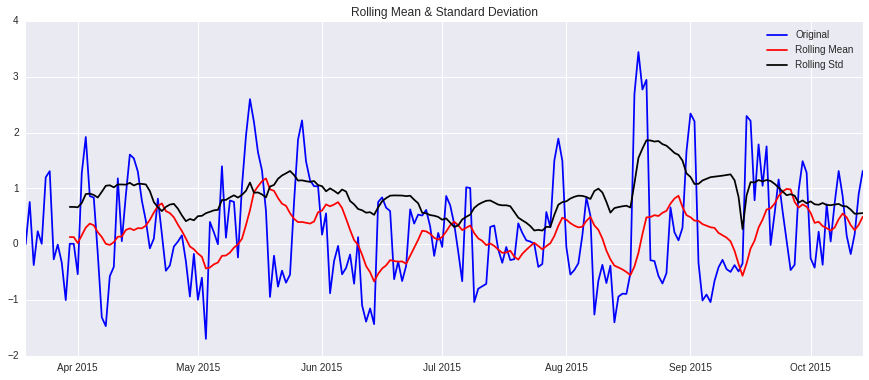

Resultados do teste Dickey-Fuller:
Teste Estatistico              -6.146092e+00
p-value                         7.760999e-08
#Lags Usados                    5.000000e+00
Numero de Observacoes Usados    2.040000e+02
Valores Criticos (1%)          -3.462818e+00
Valores Criticos (5%)          -2.875815e+00
Valores Criticos (10%)         -2.574379e+00
dtype: float64


In [33]:
test_stationarity(log_ewma_diff)

In [34]:
log_diff = df_log - df_log.shift()

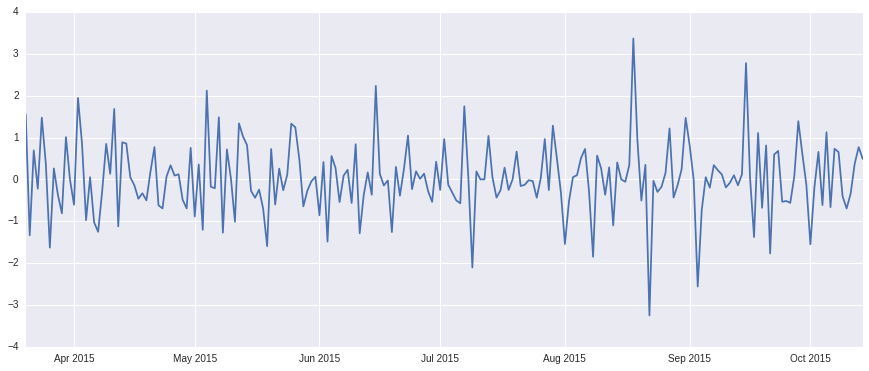

In [35]:
plt.plot(log_diff)

In [36]:
log_diff.dropna(inplace=True)
log_diff

DATE
2015-03-20    1.558145
2015-03-21   -1.335001
2015-03-22    0.693147
2015-03-23   -0.223144
2015-03-24    1.475907
2015-03-25    0.376478
2015-03-26   -1.629241
2015-03-27    0.262364
2015-03-28   -0.367725
2015-03-29   -0.810930
2015-03-30    1.011601
2015-03-31    0.000000
2015-04-01   -0.606136
2015-04-02    1.945910
2015-04-03    0.847298
2015-04-04   -0.974050
2015-04-05    0.052644
2015-04-06   -1.024504
2015-04-07   -1.252763
2015-04-08   -0.287682
2015-04-09    0.847298
2015-04-10    0.133531
2015-04-11    1.681759
2015-04-12   -1.122143
2015-04-13    0.887303
2015-04-14    0.855666
2015-04-15    0.048790
2015-04-16   -0.140357
2015-04-17   -0.461818
2015-04-18   -0.332134
                ...   
2015-09-15    2.778580
2015-09-16    0.045542
2015-09-17   -1.377203
2015-09-18    1.107621
2015-09-19   -0.679784
2015-09-20    0.811258
2015-09-21   -1.769724
2015-09-22    0.596297
2015-09-23    0.680354
2015-09-24   -0.534714
2015-09-25   -0.515722
2015-09-26   -0.561151
2015-0

/home/lserra/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:6: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).mean()
/home/lserra/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:7: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).std()


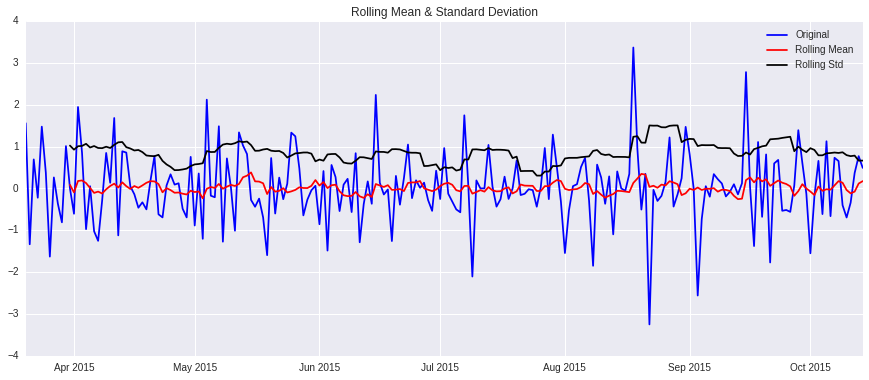

Resultados do teste Dickey-Fuller:
Teste Estatistico              -7.214089e+00
p-value                         2.196143e-10
#Lags Usados                    1.100000e+01
Numero de Observacoes Usados    1.970000e+02
Valores Criticos (1%)          -3.463987e+00
Valores Criticos (5%)          -2.876326e+00
Valores Criticos (10%)         -2.574652e+00
dtype: float64


In [37]:
test_stationarity(log_diff)

In [38]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df_log, freq=61320)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(df_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Tendência')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Sazonalidae')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Resíduos')
plt.legend(loc='best')
plt.tight_layout()

ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

ValueError: freq D not understood. Please report if you think this in error.

In [39]:
new_df = df_sales[['PRODUCT', 'QTY_ORDER']]

In [40]:
new_df.head()

,PRODUCT,QTY_ORDER
DATE,,
2015-01-01,P2,23
2015-01-01,P6,1
2015-01-01,P7,321
2015-01-02,P2,90
2015-01-02,P6,8


In [41]:
new_df = new_df.groupby(['PRODUCT']).aggregate(np.sum)

In [42]:
new_df.head(15)

,QTY_ORDER
PRODUCT,
P1,4173
P2,67844
P3,2949
P4,17309
P5,21055
P6,4237
P7,211722
P8,29820
P9,19661


In [43]:
data_dist = pdist(new_df)  # calculando as distâncias
data_link = linkage(data_dist)  # calculando as relações

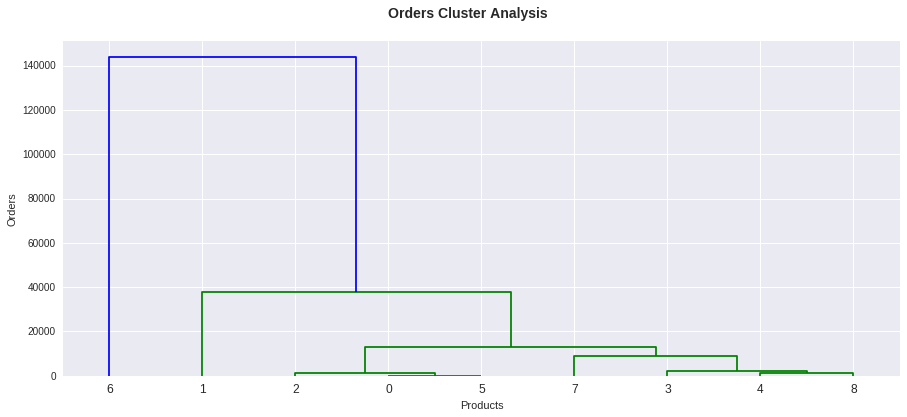

In [44]:
dendrogram(data_link)
plt.xlabel('Products')
plt.ylabel('Orders')
plt.suptitle('Orders Cluster Analysis', fontweight='bold', fontsize=14);

In [45]:
new_df = pd.read_csv(s_path + 'sel_sales_day_wo_events.csv')

In [46]:
new_df = new_df[['WEEKDAY', 'PRODUCT', 'QTY_ORDER']]

In [47]:
new_df.dtypes

WEEKDAY      object
PRODUCT      object
QTY_ORDER     int64
dtype: object

In [48]:
new_df.head(15)

,WEEKDAY,PRODUCT,QTY_ORDER
0,WED,P2,23
1,WED,P6,1
2,WED,P7,321
3,THU,P2,90
4,THU,P6,8
5,THU,P7,812
6,FRI,P2,69
7,FRI,P6,6
8,FRI,P7,662
9,SAT,P2,63


In [49]:
rcParams['figure.figsize'] = (14,12)
rcParams['font.size'] = 14

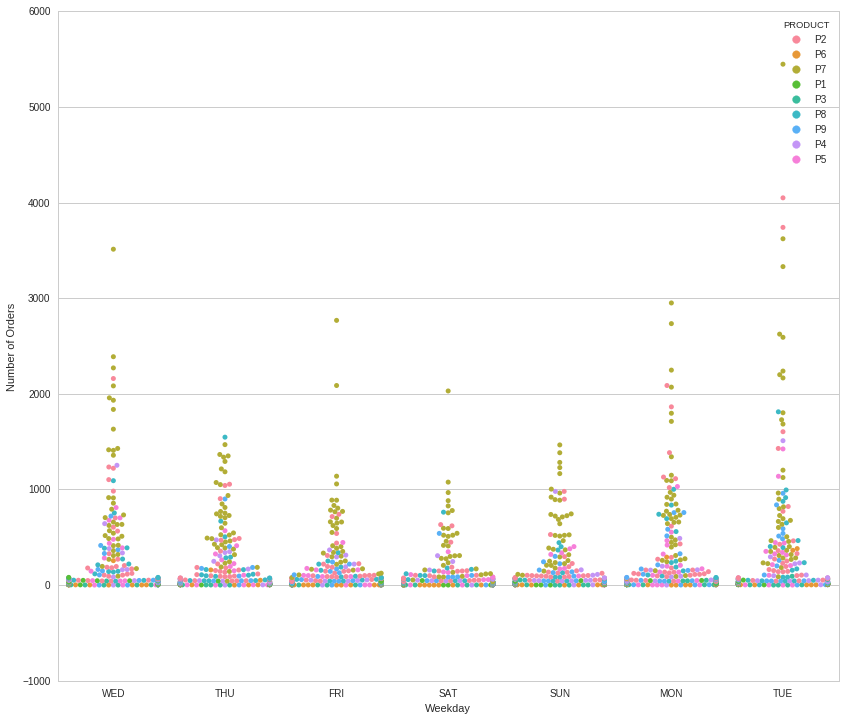

In [50]:
sns.set_style("whitegrid")
g=sns.swarmplot(x='WEEKDAY',y='QTY_ORDER',hue='PRODUCT',data=new_df)
g.set(xlabel="Weekday", ylabel="Number of Orders")

In [51]:
new_df = pd.read_csv(s_path + 'sel_sales_day_w_events.csv')

In [52]:
new_df = new_df[['WEEKDAY', 'PRODUCT', 'QTY_ORDER']]

In [53]:
new_df.dtypes

WEEKDAY      object
PRODUCT      object
QTY_ORDER     int64
dtype: object

In [54]:
new_df.head(15)

,WEEKDAY,PRODUCT,QTY_ORDER
0,FRI,P1,10
1,FRI,P2,51
2,FRI,P3,2
3,FRI,P6,2
4,FRI,P7,622
5,SAT,P1,2
6,SAT,P2,30
7,SAT,P3,6
8,SAT,P6,3
9,SAT,P7,419


In [55]:
rcParams['figure.figsize'] = (14,12)
rcParams['font.size'] = 14

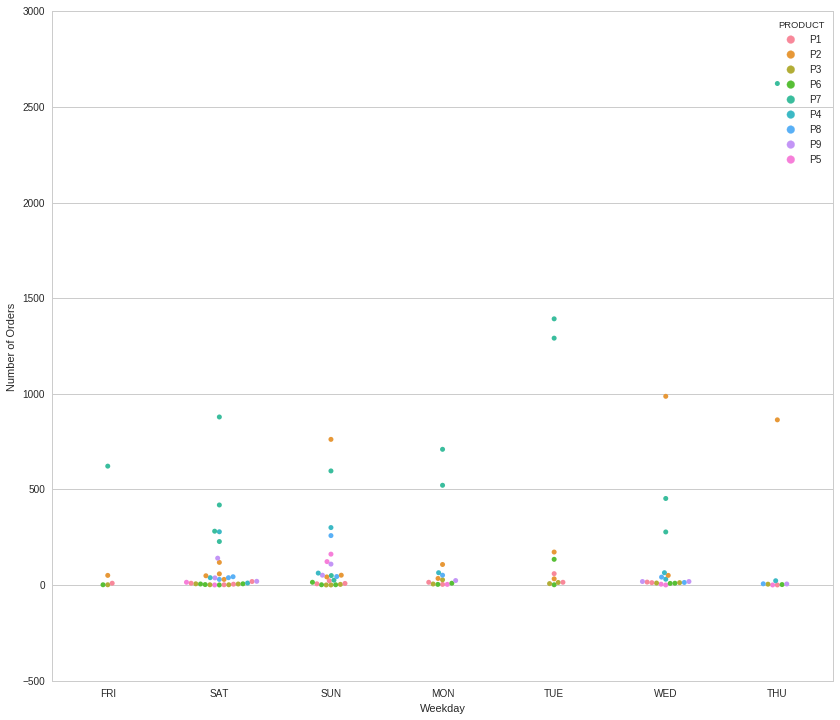

In [56]:
sns.set_style("whitegrid")
g=sns.swarmplot(x='WEEKDAY',y='QTY_ORDER',hue='PRODUCT',data=new_df)
g.set(xlabel="Weekday", ylabel="Number of Orders")